<h2>1. Multi-Layer Perceptron</h2>
In this project, you will implement a Multi-Layer Perceptron (MLP) from scratch to classify digits in the MNIST dataset[1]. Your layers must have both forward and backward pass implementations. Do NOT use inbuilt functions from PyTorch[2], or other similar libraries for the implementation of the following. You are allowed to load the MNIST dataset in any way of your choice

<h3>1.1 Implementation</h3>

In [90]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [91]:
# 1.1.1 Fully-connected layer with bias.

# A network of neurons consits of:
# - input layer,
# - hidden layers,
# - output layer

# An input layer is an array of values, which in this case, are pixel values
# if we have a 28x28 size images as an input, the array must be 28x28=784 in lenght

# we do not really need to create it with a randoms, but its better for now
# create a 28x28 matrix of random numbers between 0 and 255
input_layer = np.random.randint(0,255, size=784) 

input_layer


array([109, 189, 161, 220, 206, 171,  82,  33,  22, 142, 116, 172,  35,
        35, 212,  75,  30, 117, 214, 160, 164, 233, 226, 198, 177, 182,
         8,  15,  66, 157,  75, 135, 243, 155,  99,  22,  44,  29, 203,
       172, 112,  37, 186, 227,  84, 153,   0, 233, 134, 251,  91,  41,
       210, 121, 217, 106,   6, 141,  36, 139,  30,  16,   5,  10, 171,
        57, 183, 253,  66,  66, 122,  19, 162, 153, 137, 144, 175,  75,
       219, 221, 251,   9,  91, 250,  99, 127, 107,  84, 180, 103, 155,
       200,  16,  54, 254, 253, 175, 134,  99,   8,  99, 110, 130, 205,
        26, 153,  12, 231,  41, 188, 185,  66,  53, 105,  19, 238,  41,
       130, 160,  50, 196,  65,  56,  85, 220,  17, 155, 253,  95, 115,
       114, 167, 179, 194, 168,  68, 162,  89, 126, 248,  25, 145,  62,
        17, 232, 198,  44, 172,  72, 233,  57, 181, 194,  99,  49, 129,
        34, 130,  13, 120, 116,  41,  82,  72,  45, 133, 102, 188, 143,
       160, 151,  16,  54, 113, 105,  98,  52, 171,  30, 150, 15

In [92]:

# Now, we need to create the hidden layers
# We are going to create a layer, with 16 neurons 

# But first, lets see how a neuron should look like:
# input1 * weight1 + input2 * weight2 + ... input_n * weight_n + bias = output
# a neuron has:
# - input of n
# - weights of n
# - a bias
# - an output

# given that our network must be fully connected, each neuron is connected to every other neuron in the network
# Therefore:
# A neuron in the first hidden layer will have 784 weights and 1 bias
# input1 * weight1 + input2 * weight2 + ... input784 * weight784 + bias

# However, we cannot possible copy code for this many variables.
# A more conveinet way of thinking and solving our problems is to use 2D arrays and loops.
# Therefore: 
# layer_1 = [
#            [input1 * weight1 + input2 * weight2 + ... input1024 * weight1024 + bias1]  <- 1st neuron
#            ...
#            [input1 * weight1 + input2 * weight2 + ... input1024 * weight1024 + bias16] <- 16th neuron
#            ]
#
# Layer_1 will have 16 arrays, as we have 16 neurons
# inside, 784 weights, for each neuron, 12544 weights in total.
# But to create such a layer, we are going to use numpy

# 784x16 array with random numbers, as the weights needs to be initalized 0
layer_1 = np.random.randn(784, 16)

layer_1  # log the layer

array([[ 2.06879415, -1.09928959, -1.14313464, ...,  0.30544253,
         1.66699775,  0.31027354],
       [-0.92521754, -1.8460449 ,  0.11219043, ...,  0.12378389,
        -1.48881563,  0.77560211],
       [-0.47674237,  1.16710682,  1.68536099, ..., -0.51614561,
        -0.11315473,  0.32514885],
       ...,
       [-0.77067026, -1.49171678, -0.52609562, ...,  1.3028038 ,
         0.78503196,  0.18527681],
       [-1.08955746,  1.19011538, -0.97584537, ...,  0.43755919,
         1.03042035,  0.01221615],
       [-0.97578062, -1.54232985,  1.82266134, ..., -1.33055833,
         0.17717887, -1.54972064]])

In [93]:

# Now we got an idea how a layer should look like, however,
# we still haven't got a way to compute between the layers.
# If we look a bit further from the problem, we might see that an array is basically a matrix.

# layer_1 is an array, that holds many other arrays (AKA matrixes). 
# The inner arrays are numbers, which are the weights.
# So if we take a look how a neuron should look like:
# input1 * weight1 + input2 * weight2 + ... input_n * weight_n + bias = output
# The only missing piece of the equation is the multiplication.
# We know the inputs, we know the weights, but how do we multiply and get an ouput?
# Matrix Dot products!


# Since we are thinking of matrixes, we can use dot products
# And since we are using numpy, it will help us with the calculations.

# So given the input and the weights, we get an output for each neuron
layer_1_output = np.dot(input_layer, layer_1) 

# Considering the biases, which is just an other matrix:
bias_1 = np.random.randint(1, 3, (16))

# We just add them together
layer_1_output = layer_1_output + bias_1
layer_1_output


array([ 3909.65629603,  2550.51050846,  2531.46987866,  2978.87961677,
       -2188.5180039 ,  5365.61399097,  2174.20392484,  7640.61746444,
        -557.7451888 , -4429.86315229,  4721.70801517,  5476.48689019,
        1385.30048244,   182.89906453, -1423.03725865,   437.3139281 ])

In [94]:
# Now, we have half of our network. But extend this like this
# we would need to copy paste everything and its really unconfortable.
# a nicer solution would be to create a class

class Dense_Layer:
    def __init__(self, n_inputs, n_neurons, activator):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, input):
        self.input = input
        output = np.dot(input, self.weights) + self.biases
        self.output = output

        return output


In [95]:
# the ReLU and Sigmoid functions

def relu(x):
    return np.maximum(0.0, x)

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


In [96]:
# we can create a full NN with a few lines with activators

layer_1 = Dense_Layer(784, 30, 'relu')
layer_2 = Dense_Layer(30, 30, 'relu')
layer_3 = Dense_Layer(30, 10, 'sigmoid')


input_layer = np.random.randint(1,10, size=784) # random input
layer_1.forward(input_layer)    # hidden
layer_2.forward(relu(layer_1.output)) # hidden
layer_3.forward(sigmoid(layer_2.output)) # output


array([[ 0.0908662 ,  0.0981669 ,  0.3117164 ,  0.67126832,  0.4863839 ,
        -0.39532996, -0.28892862, -0.48732883,  0.37355713,  0.59011461]])

In [ ]:
# Cross-Entropy loss

output = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.9, 0.4],
                   [0.02, 0.9, 0.08]])
target = np.array([0, 1, 1])

def loss_function(y_pred, y_true):

    # clip the values so there is no division with 0
    # make it both sides so it stays even
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

    # return the max value from each row vector
    confidence = y_pred_clipped[range(len(y_pred)), y_true]
        
    # take the negative log function
    log_loss = -np.log(confidence)
    return log_loss # return the average of those values


# upto this point, we have most of our functions, 
# however we need to do backpropagation, and maybe define a few more functions
# for the backpropagation, make it into classes so its easier to use

In [98]:
# for backprop, we have to update a few things...
# lets begin with the Dense layer


class Dense_Layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons) 
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs # remember the input values
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, d_values):

        # calculate the gradients 
        # these calculations are also on the slides 
        self.d_weights = np.dot(self.inputs.T, d_values)
        self.d_biases = np.sum(d_values, axis=0, keepdims=1)
        self.d_inputs = np.dot(d_values, self.weights.T)


In [99]:
# for the activators

class Activation_ReLU:

    # forward pass for Relu
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    # derivative for backprop
    def backward(self, d_values):
        # copy the matrix so it doesnt get edited by function 
        self.d_inputs = d_values.copy()

        # where the inputs are less or 0, make it 0
        self.d_inputs[self.inputs <= 0] = 0


In [100]:
class Activation_Sigmoid:

    def forward(self, inputs):
        self.inputs = inputs
        self.output = 1.0 / (1 + np.exp(-inputs))

    def backward(self, d_values):
        # copy the matrix so it doesnt get edited by function 
        self.d_inputs = d_values.copy()

        # derivative of sigmoid
        self.d_inputs = d_values * (1.0 - d_values)


In [101]:
# softmax is a better activator and more commonly used then sigmoid
# so i will use this to get better results
# its also mentioned in class a lot, so I thought its okey

class Activation_Softmax:

    def forward(self, inputs):

        self.inputs = inputs #remember inputs

        # index unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        # normalize them
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)

        self.output = probabilities # output

    def backward(self, d_values):
        self.d_inputs = np.empty_like(d_values) # create array

        # enumare the outputs and the gradients at the same time
        for index, (single_output, single_d_values) in enumerate(zip(self.output, d_values)):
            # flatten output array
            single_output = single_output.reshape(-1,1)

            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

            # calc sample wise gradient and add it to array
            self.d_inputs[index] = np.dot(jacobian_matrix, single_d_values)

    


In [102]:
# also lets edit our loss function a bit

class Loss_CategoricalCrossEntropy():

    def calculate(self, output, y):

        # get individual losses
        losses = self.forward(output, y)

        #return average
        return np.mean(losses)

    # in forward, its just calculating the loss
    def forward(self, y_pred, y_true):

        # clip the values so there is no division with 0
        # make it both sides so it stays even
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # return the max value from each row vector
        # this is only for categorical labels
        if len(y_true.shape) == 1:
            confidence = y_pred_clipped[range(len(y_pred)), y_true]

        # we need to add a different method if the there is one-hot encoded labels
        # it doesnt happen in this excersise, but I thought its a nice addition
        elif len(y_true.shape) == 2:
            confidence = np.sum(y_pred_clipped * y_true, axis=1)
        
        # take the negative log function
        log_loss = -np.log(confidence)
        return log_loss


    # backward here means calculating gradient... It might make the process a bit more
    # "straight forward", so its mainly just a naming convention 
    def backward(self, d_values, y_true):
        
        # we need a one-hot encoder if we dont have it already
        if len(y_true.shape) == 1:
            y_true = np.eye(len(d_values[0]))[y_true]

        # calculate the gradient
        self.d_inputs = (-y_true / d_values ) / len(d_values)


In [103]:
# to make things even more straight forward,
# i combine the softmax wiht the loss function, so its faster
class Activation_Softmax_With_CCE:

    def __init__(self):

        # get the 2 components
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossEntropy()

    def forward(self, inputs, y_true):
        
        self.activation.forward(inputs) # activator
        self.output = self.activation.output #output

        self.loss_val = self.loss.calculate(self.output, y_true)
    
    def backward(self, d_values, y_true):

        # if the labels are hot-encoded turn them to 1 array
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        self.d_inputs = d_values.copy()
        self.d_inputs[range(len(d_values)), y_true] -= 1

        self.d_inputs = self.d_inputs / len(d_values)


In [104]:
# finally, lets create an optimizer class which will update the values

class Optimizer_SGD:

    def __init__(self, learning_rate):
        self.learning_rate = learning_rate

    # a function that gets the d_values and updates them
    # in relation to the learning rate
    def update_params(self, layer:Dense_Layer):
        layer.weights -= layer.d_weights * self.learning_rate 
        layer.biases -= layer.d_biases * self.learning_rate

In [105]:
# load the MNIST dataset from a csv
train_data = pd.read_csv('./data/mnist_train.csv')
test_data = pd.read_csv('./data/mnist_test.csv')

Epoch: 1, Accuracy: 0.5793641414141418, Loss: 1.3932028118095885
Epoch: 2, Accuracy: 0.8674484848484855, Loss: 0.4463917216686439
Epoch: 3, Accuracy: 0.9016488215488224, Loss: 0.33071062197994394
Epoch: 4, Accuracy: 0.9158491582491587, Loss: 0.28352138799508675
Epoch: 5, Accuracy: 0.9262324915824928, Loss: 0.2514638222111909
accuracy: 83.8%


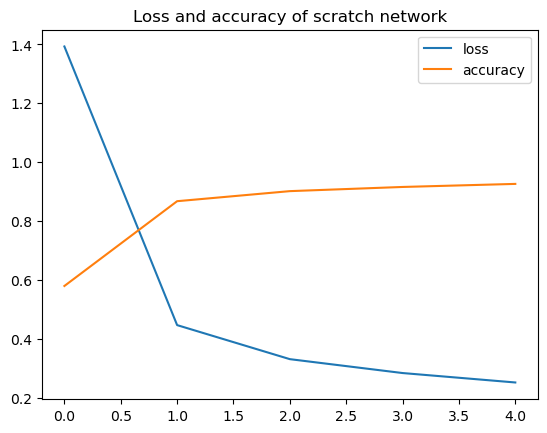

In [106]:

cost_history = []
accuracy_history = []

# create the layers
dense_1 = Dense_Layer(784, 128)
dense_2 = Dense_Layer(128, 64)
dense_3 = Dense_Layer(64, 32)
dense_4 = Dense_Layer(32, 10)

# create the activators
activator1 = Activation_ReLU()
activator2 = Activation_ReLU()
activator3 = Activation_ReLU()
loss_and_activation = Activation_Softmax_With_CCE()

optimizer = Optimizer_SGD(0.018)

# iterate the data with some array magic
batch_size = 100
batch = [train_data[i:i+batch_size] for i in range(0, len(train_data), batch_size)]

epochs = 5

for epoch in range(epochs):

    loss_val = 0
    acc_val = 0

    # iterate in batches (60k/batch_size)
    for i in range(600):

        # iter data
        first_column = batch[i].columns[0]
        x = batch[i].drop(columns=first_column).to_numpy()
        x = (x - np.mean(x)) /255.0 # normalize data
        y = batch[i][first_column].to_numpy()

        # forward
        input_layer = x
        dense_1.forward(input_layer)        # hidden
        activator1.forward(dense_1.output)  # relu
        dense_2.forward(activator1.output)     # hidden
        activator2.forward(dense_2.output)  # relu
        dense_3.forward(activator2.output)     # output
        activator3.forward(dense_3.output)  # relu
        dense_4.forward(activator3.output)     # output
        loss_and_activation.forward(dense_4.output, y) # loss and softmax
        
        # save the loss and accuracy
        prediction = np.argmax(loss_and_activation.output, axis=1)
        acc_val += np.mean(prediction == y)
        loss_val += loss_and_activation.loss_val

        # backprop
        loss_and_activation.backward(loss_and_activation.output, y)
        dense_4.backward(loss_and_activation.d_inputs)
        activator3.backward(dense_4.d_inputs)
        dense_3.backward(activator3.d_inputs)
        activator2.backward(dense_3.d_inputs)
        dense_2.backward(activator2.d_inputs)
        activator1.backward(dense_2.d_inputs)
        dense_1.backward(activator1.d_inputs)

        # update
        optimizer.update_params(dense_1)
        optimizer.update_params(dense_2)
        optimizer.update_params(dense_3)
        optimizer.update_params(dense_4)

    # save the loss and accuracy
    cost_history.append(loss_val/600)
    accuracy_history.append(acc_val/600)

    # print the epoch, accuracy and loss
    print(f'Epoch: {epoch+1}, Accuracy: {acc_val/600}, Loss: {loss_val/600}')    

plt.plot(cost_history, label='loss')
plt.plot(accuracy_history, label='accuracy')
plt.legend(['loss', 'accuracy'])
plt.title('Loss and accuracy of scratch network')

np.mean(accuracy_history)

print('accuracy: {:.1f}%'.format(np.mean(accuracy_history)*100))


In [107]:
# lets see how it performs on the test set

accuracy_history = []

i = 0
batch_size = 100
batch = [test_data[i:i+batch_size] for i in range(0, len(test_data), batch_size)]
epochs = 60

for epoch in range(epochs):

    # iter data
    first_column = batch[i].columns[0]
    x = batch[i].drop(columns=first_column).to_numpy()
    x = (x - np.mean(x)) /255.0 # normalize data
    y = batch[i][first_column].to_numpy()
    i += 0

    # forward
    input_layer = x
    dense_1.forward(input_layer)        # hidden
    activator1.forward(dense_1.output)  # relu
    dense_2.forward(activator1.output)     # hidden
    activator2.forward(dense_2.output)  # relu
    dense_3.forward(activator2.output)     # output
    activator3.forward(dense_3.output)  # relu
    dense_4.forward(activator3.output)     # output
    loss_and_activation.forward(dense_4.output, y) # loss and softmax
    
    cost_history.append(loss_and_activation.loss_val)
    prediction = np.argmax(loss_and_activation.output, axis=1)
    if len(y.shape) == 2:
        y= np.argmax(y, axis=1)
    accuracy_history.append(np.mean(prediction == y))
    

np.mean(accuracy_history)
print('accuracy: {:.1f}%'.format(np.mean(accuracy_history)*100))

accuracy: 95.0%


In [108]:
# question 1.4 

# imports

import torch
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [113]:
# I think its easier to reload the data and normalize it again
# then use my custom function which is questionable I admit
# I also need to make it for the next assigment as well so its better to do it now

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))                    
    ])

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

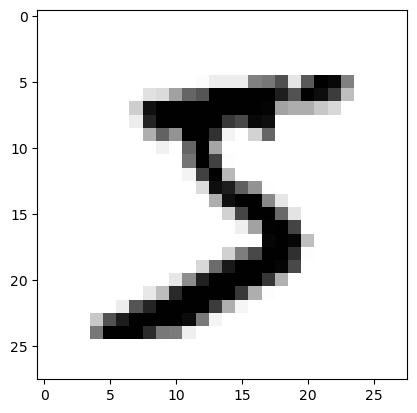

In [114]:
# get one batch of data
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the first image
plt.imshow(np.squeeze(images[0]), cmap='gray_r')


In [115]:
# https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/mnist-mlp/mnist_mlp_solution.ipynb

# Create MLP from pytoch class
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 512)
        self.layer2 = nn.Linear(512, 512)
        self.layer3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(-1, 28 * 28)

        x = F.relu(self.layer1(x))
        x = self.dropout(x)
        x = F.relu(self.layer2(x))
        x = self.dropout(x)
        x = self.layer3(x)
        return x 
        
    
model = MLP()
print(model)



MLP(
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=512, bias=True)
  (layer3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [116]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.08)

epochs = 30
train_losses, test_losses = [], []
accuracy_history = []

model.train()

# maybe do the training for the scratch 
# https://www.kaggle.com/code/neupane9sujal/multi-level-perceptron-from-scratch?scriptVersionId=153403387

for epoch in range(epochs):
    train_loss = 0.0
    acc_val = 0

    for data, target in train_loader:

        optimizer.zero_grad()

        output = model(data)

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        acc_val += np.mean(np.argmax(output.detach().numpy(), axis=1) == target.detach().numpy())

        train_loss += loss.item()*data.size(0)
    
    accuracy_history.append(acc_val/len(train_loader))
    train_losses.append(train_loss/len(train_loader.dataset))
    print(f'Epoch: {epoch+1}, Accuracy: {acc_val/len(train_loader)}, Loss: {train_loss/len(train_loader.dataset)}')

Epoch: 1, Accuracy: 0.932783333333333, Loss: 0.22277957760871506
Epoch: 2, Accuracy: 0.9705999999999955, Loss: 0.10002334627003438
Epoch: 3, Accuracy: 0.9780999999999936, Loss: 0.07118088643934364
Epoch: 4, Accuracy: 0.9824333333333272, Loss: 0.05653458994449041
Epoch: 5, Accuracy: 0.9853666666666607, Loss: 0.04561132675714544
Epoch: 6, Accuracy: 0.9872333333333275, Loss: 0.038941946257789066
Epoch: 7, Accuracy: 0.9887333333333274, Loss: 0.03375685038616204
Epoch: 8, Accuracy: 0.9900166666666622, Loss: 0.029917540169797426
Epoch: 9, Accuracy: 0.9915666666666628, Loss: 0.024279861278814527
Epoch: 10, Accuracy: 0.9917166666666625, Loss: 0.025255311247401192
Epoch: 11, Accuracy: 0.9918666666666613, Loss: 0.022902654573424476
Epoch: 12, Accuracy: 0.9938666666666631, Loss: 0.017698193001877742
Epoch: 13, Accuracy: 0.9934499999999952, Loss: 0.018949416663864772
Epoch: 14, Accuracy: 0.9937166666666639, Loss: 0.018396867025161627
Epoch: 15, Accuracy: 0.9948666666666638, Loss: 0.015315348351935

Text(0.5, 1.0, 'Train Loss of pytorch network')

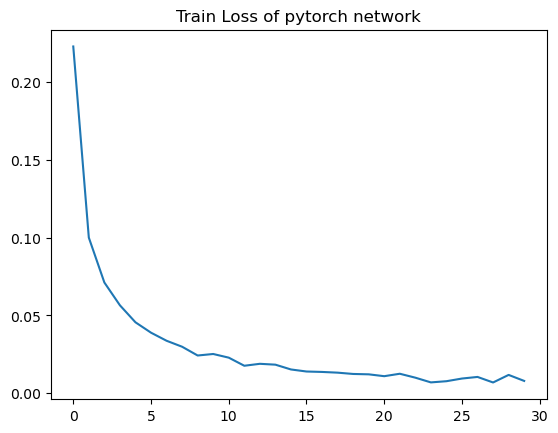

In [117]:
plt.plot(train_losses)
plt.title('Train Loss of pytorch network')


In [118]:
test_loss = 0.0
correct = 0
model.eval()

for data, target in test_loader:

    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)

    pred = torch.max(output, 1)[1]
    correct += pred.eq(target.view_as(pred)).sum()


print('Test loss: {:.1}'.format(test_loss/len(test_loader.dataset)))
print('Test accuracy: {:.1%}'.format(correct/len(test_loader.dataset))) 



Test loss: 0.08
Test accuracy: 98.5%
